In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import time
from pylab import *
from IPython.display import clear_output

In [ ]:
def plot(data, file_name):
    data = np.array(data)
    print("Number of epocs: ", data.shape[0])
    x = np.arange(0, data.shape[0], 1)
    y = np.array(data, dtype=float)
    train_acc = data[:,:1]
    val_acc = data[:,1:2]
    loss = data[:,-1:]
    
    file_name = str(file_name)
    file = file_name.split('-')
    file = 'Epoch('+str(file[0])+')-RNNSize('+str(file[1])+')-Layers('+str(file[2])+\
    ')-EmbeddingDim('+str(file[3])+')-LR('+str(file[4])+')-KProb('+str(file[5])+')'

    fig = plt.figure(1,figsize=(20,20))
    fig.suptitle(file, fontsize=16)
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(x, loss, '-')
    plt.xlabel('Batch Runs', fontsize=14, color='blue')
    plt.ylabel('Loss', fontsize=14, color='blue')
    
    plt.subplot(212)
    plt.title('Accuracies')
    plt.plot(x, train_acc, '-', label="Train Acc")
    plt.plot(x, val_acc, "-", label="Val Acc")
    plt.xlabel('Batch Runs', fontsize=14, color='blue')
    plt.ylabel('Accuracy', fontsize=14, color='blue')
    fig.savefig(file+'.png')
    legend()
    plt.show()

Ploting file:  10-256-3-256-0.001-0.65-512-info.txt
Number of epocs:  2680


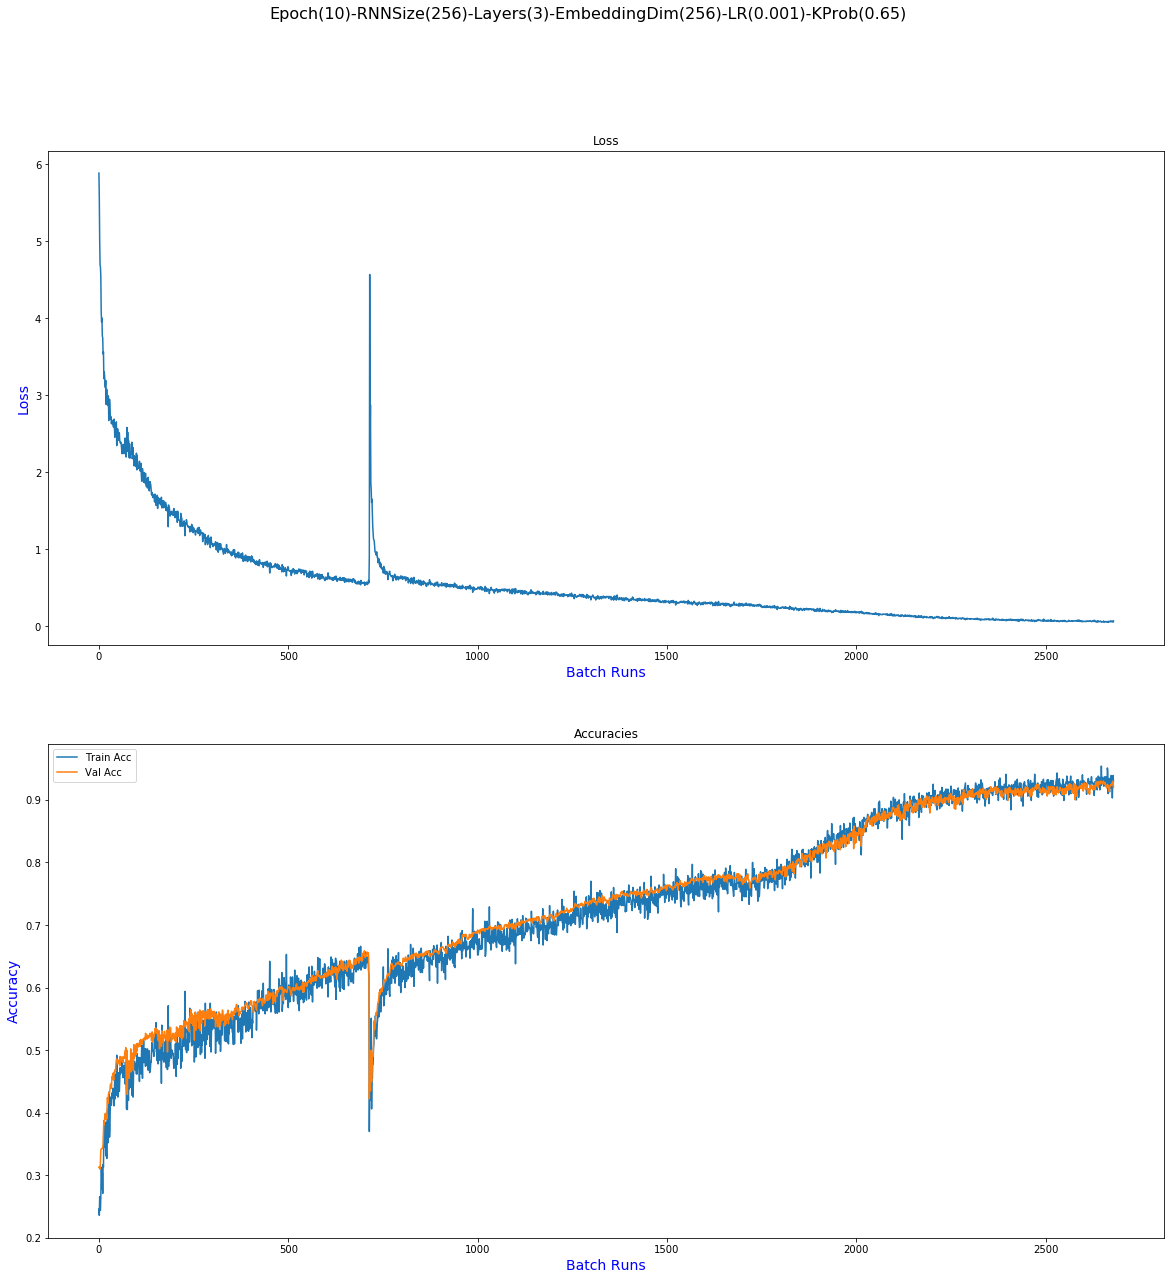

In [ ]:
while(1):
    clear_output()
    directory = 'checkpoints/'
    run_data = [file for file in os.listdir(directory) if '.txt' in file]
    for file in run_data:
        with open(directory+file) as f:
            content = f.read()
            lines = [line for line in content.split('\n')]
            splited_lines = [[data for data in line.split(':')[-3:]] for line in lines[:-1]]
            data = [[word.strip().split(',')[0] for word in line] for line in splited_lines]
            print("Ploting file: ", file)
            plot(data, file)
    time.sleep(30)        